# Problem 1a

Lagrange formula for the interpolating polynomial of $f$ at $x_{0}, x_{1}, . . . , x_{n}$: 
$$p_{n}(x) = \omega(x)\sum_{j=0}^{n}\frac{\lambda_{j}}{x - x_{j}}f_{j}$$

Newton's form of $p_{n}$:
$$p_{n}(x) = f[x_{0}] + f[x_{0}, x_{1}](x - x_{0}) + \dots + f[x_{0}, \dots, x_{n}](x - x_{0})\dots(x - x_{n - 1})$$
$$\omega(x)\sum_{j=0}^{n}\frac{\lambda_{j}}{x - x_{j}}f_{j} = f[x_{0}] + f[x_{0}, x_{1}](x - x_{0}) + \dots + f[x_{0}, \dots, x_{n}](x - x_{0})\dots(x - x_{n - 1})$$
$$(x - x_{0})\dots(x - x_{n})\sum_{j=0}^{n}\frac{\lambda_{j}}{x - x_{j}}f_{j} = f[x_{0}] + f[x_{0}, x_{1}](x - x_{0}) + \dots + f[x_{0}, \dots, x_{n}](x - x_{0})\dots(x - x_{n - 1})$$

Note that on the left side of the equation, we have the highest degree as n + 1 for $\omega(x)$. However, when we pull $\omega$ to the summation $\frac{\omega(x)}{x - x_{j}}$, we get $(x - x_{0})\dots(x - x_{j - 1})(x - x_{j + 1})\dots(x - x_{n}) = \prod_{\substack{k = 0 \\ k \neq j}}^{n}(x - x_{k})$ with the highest degree as n and leading coefficient as 1. Then the leading coefficient for the Lagrange form of the interpolation polynomial becomes
$$
\sum_{j = 0}^{n}\frac{f(x_{j})}{\prod_{\substack{k = 0 \\ k \neq j}}^{n}(x_{j} - x_{k})}
$$
For the right side of the equation, the highest degree n is in the term $f[x_{0}, \dots, x_{n}](x - x_{0})\dots(x - x_{n - 1})$, in which the leading coefficient is $f[x_{0}, \dots, x_{n}]$. Therefore, we have that
$$
f[x_{0}, \dots, x_{n}] = \sum_{j = 0}^{n}\frac{f(x_{j})}{\prod_{\substack{k = 0 \\ k \neq j}}^{n}(x_{j} - x_{k})}
$$

# Problem 1b

Meaning of divided differences are symmetric functions of their arguments: For $x_{0}, x_{1}, x_{2}$, $f[x_{0}, x_{1}, x_{2}] = f[x_{2}, x_{1}, x_{0}] = f[x_{1}, x_{2}, x_{0}] = \dots$

Proof: Let $\sigma:\{0, \dots, n\} \rightarrow \{0, \dots, n\} $ be the permutation for divided differences. We want to show that $f[x_{\sigma(0)}, \dots, x_{\sigma(n)}] = f[x_{0}, \dots, x_{n}]$, which is equivalent to show that 
$$
\sum_{j=0}^{n}\frac{f(x_{\sigma(j)})}{\prod_{\substack{k = 0 \\ k \neq j}}^{n}(x_{\sigma(j)} - x_{\sigma(k)})} = \sum_{j=0}^{n}\frac{f(x_{j})}{\prod_{\substack{k = 0 \\ k \ne j}}^{n}(x_{j} - x_{k})}
$$

Note that on the left side, the denominator is a product of linear terms $x_{\sigma(j)} - x_{\sigma(k)}$ skipping the case when $j = k$. Since $\sigma$ is a permutation, it is also bijective. Then for each $y \in \{0, \dots, n\}$, there exists a unique $x \in \{0, \dots, n\}$ such that $\sigma(x) = y$. In this case, each term in the summation becomes
$$
\frac{f(x_{\sigma(j)})}{\prod_{\substack{k = 0 \\ k \neq j}}^{n}(x_{\sigma(j)} - x_{\sigma(k)})} = \frac{f(x_{j})}{\prod_{\substack{k = 0 \\ k \ne j}}^{n}(x_{j} - x_{k})}
$$
This means that the summation of the unique left hand side equals the summation of the unique right hand side, which proves the claim.

In [49]:
# This is implementation of the Newton’s form and Lagrange form of the interpolation polynomial for problem 2a written by Jennie Wu
# Last modified: Nov. 5th, 2021
# Input: number of coefficients, list of x values, f values determined by each x value, and x value we want to evalutae at
# Expected Output: p_{n}(x)

import numpy as np
import math

def coefficient(n, xValues, f):
    cj = np.zeros(n + 1)
    for j in range(n + 1):
        cj[j] = f(xValues[j])
    for k in range(1, n + 1):
        for i in range(n, k - 1, -1):
            cj[i] = float(cj[i] - cj[i - 1]) / (xValues[i] - xValues[i - k])
    return cj

def Newton(n, x, xValues, f):
    cj=coefficient(n, xValues, f)
    p = cj[n]
    for j in range(n - 1, -1, -1):
        p = cj[j] + (x - xValues[j]) * p
    return p

#test case: $f(x) = 1 + x^{2}, x_{j} = j, f_{j} = f(x_{j}) for j = 0, \dots, 3$
def fTest(x):
    return 1 + x ** 2

print("$p_{3}(3)$ =", Newton(3, 3, [0, 1, 2, 3], fTest))


$p_{3}(3)$ = 10.0


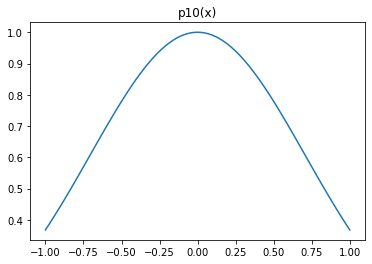

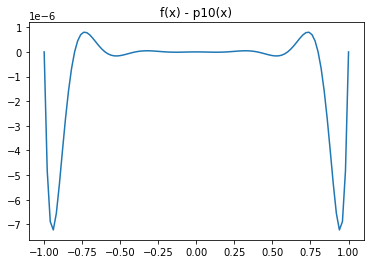

In [44]:
# Problem 2b written by Jennie Wu
# Last modified: Nov. 5th, 2021
# Input: x value and number of coefficients we need
# Expected Output: plot for the error function

import matplotlib.pyplot as plt

def fb(x):
    return math.e ** (-(x ** 2))

def xj(n):
    xj = np.zeros(n + 1)
    for j in range(n + 1):
        xj[j] = -1 + j * (2 / float(n))
    return xj

x = np.linspace(-1, 1, 101)
p10 = [Newton(10, i, xj(10), fb) for i in xj(100)]
f_b = [fb(i) for i in xj(100)]
error = [f_b[i] - p10[i] for i in range(101)]

plt.plot(x, p10) 
plt.title("p10(x)")
plt.show()

plt.plot(x, error) 
plt.title("f(x) - p10(x)")
plt.show()

# Problem 3 Inverse Interpolation

| $y_{j} = f(x_{j})$ | $x_{j}$ |  |
| --- | --- | --- |
| $y_{0} = −0.106530659712633$ | $x_{0} = 0.5$ |  |
| $y_{1} = 0.051188363905973$ | $x_{1} = 0.6$ | $f^{-1}[y_{0}, y_{1}]$ |

$$
f^{-1}[y_{0}, y_{1}] = \frac{x_{1} - x_{0}}{y_{1} - y_{0}} = \frac{0.6 - 0.5}{0.051188363905973 - (−0.106530659712633$)} = \frac{0.1}{0.15771902361860599} = 0.6340389238131391
$$

$$
p_{1}(0) = x_{0} - y_{0}f^{-1}[y_{0}, y_{1}] = 0.5 - (−0.106530659712633) \times 0.6340389238131391 = 0.5675445848373015
$$

# Problem 4 Hermite Interpolation Polynomial

||||||
|---|---|---|---|---|
| $x_{0}$ | $f(x_{0})$ ||||
| $x_{0}$ | $f(x_{0})$ | $f'(x_{0})$ |||
| $x_{1}$ | $f(x_{1})$ | $f[x_{0}, x_{1}]$ | $f[x_{0}, x_{0}, x_{1}]$ ||
| $x_{1}$ | $f(x_{1})$ | $f'(x_{1})$ | $f[x_{0}, x_{1}, x_{1}]$ | $f[x_{0}, x_{0}, x_{1}, x_{1}]$ |

Applying $f(0) = 0, f'(0) = 0, f(1) = 2, f'(1) = 3 \Rightarrow$

||||||
|---|---|---|---|---|
| 0 | 0 ||||
| 0 | 0 | 0 |||
| 1 | 2 | 2 | 2 ||
| 1 | 2 | 3 | 1 | -1 |

$$
p(x) = f(x_{0}) + f'(x_{0})(x - x_{0}) + f[x_{0}, x_{0}, x_{1}](x - x_{0})^{2} + f[x_{0}, x_{0}, x_{1}, x_{1}](x - x_{0})^{2}(x - x_{1})
$$
$$
= 0 + 0(x - 0) + 2(x - 0)^{2} - 1(x - 0)^{2}(x - 1)
$$
$$
= 2x^{2} - x^{2}(x - 1)
$$